In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, precision_score , f1_score, roc_curve)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''
1-perProcessing
     1/1:  load_dataset
     1/2:  missing_value
     1/3:  duplicates
     1/4:  concatation
     1/5:  outliers
     1/6:  noises
     1/7:  train and test data
2-Processing
     2/0:  normalize
     2/1:  fit(train)
     2/2:  score 

3-PpostProcessing
     3/1: overfit and under fit
     3/2:reducin demensions

 
''';


In [3]:
cancer_data = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_data['data'], columns=cancer_data['feature_names'])
cancer_target = cancer_data['target']

In [4]:
# evaluate is null
cancer_df.isnull().any()
# evaluate is duplicated
cancer_df.duplicated().any()

False

In [5]:
# evaluate outliers

def get_outliers_indexes(df):
   res = {}
   for col in df: 
        q1, q3 = np.quantile(df[col], (0.25, 0.75))
        IQR = q3 -q1
        upper = df[col] >= (q3+ IQR*1.5)
        lower = df[col] <= (q1- IQR*1.5)
        res[col] = np.concatenate((upper[upper==True].index.values, lower[lower==True].index.values))      
   return res
    
    

In [6]:
s = cancer_df['worst concavity']
q1, q3 = np.quantile(cancer_df['worst concavity'], (0.25, 0.75))
iqr = q3 - q1
upper = q3 + iqr*1.5
lower = q1 - iqr-1.5

In [7]:

outliers_indexes = get_outliers_indexes(cancer_df)

In [8]:
#noises



In [9]:
#train and test data:

x_train, x_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_target, test_size=0.3, stratify=cancer_target, random_state=42)

In [10]:
#model training

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [11]:
# scor the model

knn.score(x_test, y_test)

0.9239766081871345

In [12]:
# confusion matix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm
tp, fn , fp, tn = cm.ravel()

In [13]:
# accuracy_score = Σ(T) / all
a_score = accuracy_score(y_test, y_pred)

# recall_score =  TP / TP+FN
recall_score(y_test, y_pred,pos_label=0)

# specificity = TN / (TN + FP)
recall_score(y_test, y_pred, pos_label=1)

# precision = TP / Σ(P)
precision_score(y_test, y_pred, pos_label=0)

# f1_score = 2TP / (2TP + FP + FN)
f1_score(y_test, y_pred, pos_label=0);

In [14]:
# ROC curve
fpr, tpr, threshols = roc_curve(y_test, y_pred)

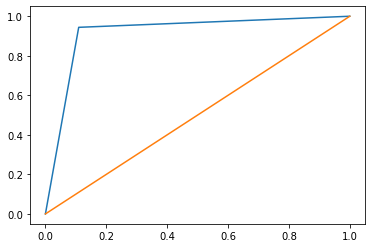

In [15]:
sns.lineplot(x=fpr, y=tpr)
plt.plot( [0,1]);